In [1]:
import cv2, simplejson, os, shutil
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

In [2]:
fileName = '20170507T155114.708081'
fileNameVideo = fileName + '.avi'
vidcap = cv2.VideoCapture(fileNameVideo)

In [3]:
fileNameEvents = fileName + '-events.json'
events = simplejson.loads(open(fileNameEvents).read())
events

[{'end-frame': 111,
  'event-class': '0 added',
  'object-class': 'Clover Organic 2% Milk',
  'start-frame': 81},
 {'end-frame': 135,
  'event-class': '1 removed',
  'object-class': 'Clover Organic 2% Milk',
  'start-frame': 111},
 {'end-frame': 176,
  'event-class': '0 added',
  'object-class': 'Horizon Organic Chocolate Milk',
  'start-frame': 141},
 {'end-frame': 196,
  'event-class': '1 removed',
  'object-class': 'Horizon Organic Chocolate Milk',
  'start-frame': 176},
 {'end-frame': 228,
  'event-class': '0 added',
  'object-class': 'Horizon Organic Chocolate Milk',
  'start-frame': 208},
 {'end-frame': 264,
  'event-class': '1 removed',
  'object-class': 'Horizon Organic Chocolate Milk',
  'start-frame': 234}]

In [4]:
frames_start = np.zeros(len(events))
frames_end = np.zeros(len(events))
labels = np.zeros(len(events))
for idx, event in enumerate(events):
    frames_start[idx] = event['start-frame']
    frames_end[idx] = event['end-frame']-1
    if event['event-class'] == '0 added' or event['event-class'] == '0 removed':
        labels[idx] = 0
    elif event['event-class'] == '1 added':
        labels[idx] = 1
    elif event['event-class'] == '1 removed':
        labels[idx] = -1
    elif event['event-class'] == '2 added':
        labels[idx] = 2
print(frames_start)
print(frames_end)
print(labels)

[  81.  111.  141.  176.  208.  234.]
[ 110.  134.  175.  195.  227.  263.]
[ 0. -1.  0. -1.  0. -1.]


In [5]:
n = 5
frames = np.zeros((n,frames_start.shape[0]))
for i in range(frames_start.shape[0]):
    frames[:,i] = np.linspace(frames_start[i],frames_end[i],n)
frames = np.floor(frames)

In [6]:
inputSize = 64
dirname = 'img'

if not os.path.isdir(dirname):
    os.mkdir(dirname)

success,image = vidcap.read()
count = 0
success = True
while success:
    success,image = vidcap.read()
    #print('Read a new frame: '), success
    if np.any(frames == count):
        image_crop = image[100:500, 150:800]
        image_down = cv2.resize(image_crop, dsize=(inputSize,inputSize), interpolation = cv2.INTER_CUBIC)
        imageFileName = '%s/f%d.jpg' % (dirname, count)
        cv2.imwrite(imageFileName, image_down)     # save frame as JPEG file
    count += 1
vidcap.release()

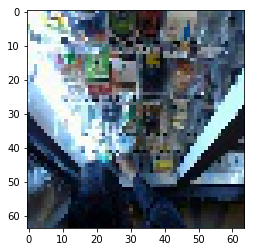

In [7]:
f = img.imread('img/f%d.jpg' % np.random.choice(frames.reshape(frames.size)))
plt.imshow(f)
plt.show()

In [8]:
count = 0
for filename in os.listdir('.'):
    
    if filename.endswith('.avi'): 
        fileName = os.path.splitext(filename)[0]
        
        # read json
        fileNameEvents = fileName + '-events.json'
        events = simplejson.loads(open(fileNameEvents).read())
        
        # store start/end frames and labels
        frames_start = np.zeros(len(events))
        frames_end = np.zeros(len(events))
        labels = np.zeros(len(events))
        for idx, event in enumerate(events):
            frames_start[idx] = event['start-frame']
            frames_end[idx] = event['end-frame']-1
            if event['event-class'] == '0 added' or event['event-class'] == '0 removed':
                labels[idx] = 0
            elif event['event-class'] == '1 added':
                labels[idx] = 1
            elif event['event-class'] == '1 removed':
                labels[idx] = -1
            elif event['event-class'] == '2 added':
                labels[idx] = 2
        
        # sample frame indices
        n = 5
        frames = np.zeros((n,frames_start.shape[0]))
        for i in range(frames_start.shape[0]):
            frames[:,i] = np.linspace(frames_start[i],frames_end[i],n)
        frames = np.floor(frames)

        # make a separate image folder
        if not os.path.isdir('img'):
            os.mkdir('img')
        temp = 'img/%s' % fileName
        if not os.path.isdir(temp):
            os.mkdir(temp)
            
        # load video
        fileNameVideo = fileName + '.avi'
        vidcap = cv2.VideoCapture(fileNameVideo)
        
        # data augmentation
        inputSize = 64
        success,image = vidcap.read()
        count = 0
        success = True
        while success:
            success,image = vidcap.read()
            if np.any(frames == count):
                # center crop
                image_crop = image[100:500, 150:800]
                
                # downsampling
                image_down = cv2.resize(image_crop, dsize=(inputSize,inputSize), interpolation = cv2.INTER_CUBIC)
                
                # write image
                imageFileName = 'img/%s/f%d.jpg' % (fileName, count)
                cv2.imwrite(imageFileName, image_down)     # save frame as JPEG file
            count += 1
            
        vidcap.release()
        
    else:
        continue

In [9]:
#shutil.rmtree('img')
#os.path.isdir('img')